In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
save_directory = '/home/flanigan/temp/'

In [3]:
f_r = np.load(save_directory + 'resonance_frequencies_180_mK.npy')

In [4]:
1e-6 * f_r

array([ 1919.69432779,  2062.5021086 ,  2335.40458665,  2396.46803224,
        2591.00377748,  2676.49488674,  2757.56902622,  2778.68139395,
        2792.43786231,  2806.28495819,  2807.41539914,  2816.12867816,
        2881.44454812,  2921.42028171,  2955.64281538,  2958.39476355,
        2961.17337062,  2979.83148276,  2998.28496302,  3001.22215264,
        3061.67203117,  3063.34899769,  3065.77506332,  3078.08791326,
        3081.02305437,  3084.91859403,  3091.41646027,  3092.7501607 ,
        3096.55058871,  3097.31788627,  3122.21754392,  3126.84980385,
        3132.52827551,  3187.67210418,  3208.74173947,  3224.0837836 ,
        3229.52479937,  3248.25386106,  3263.4529736 ,  3268.23807844,
        3277.25883588,  3278.96380799,  3316.65056492,  3325.59070082,
        3326.78242135,  3347.30017485,  3370.60342733,  3409.71130211,
        3420.6654874 ,  3433.32176371,  3450.51017169,  3470.40498453,
        3922.23733329])

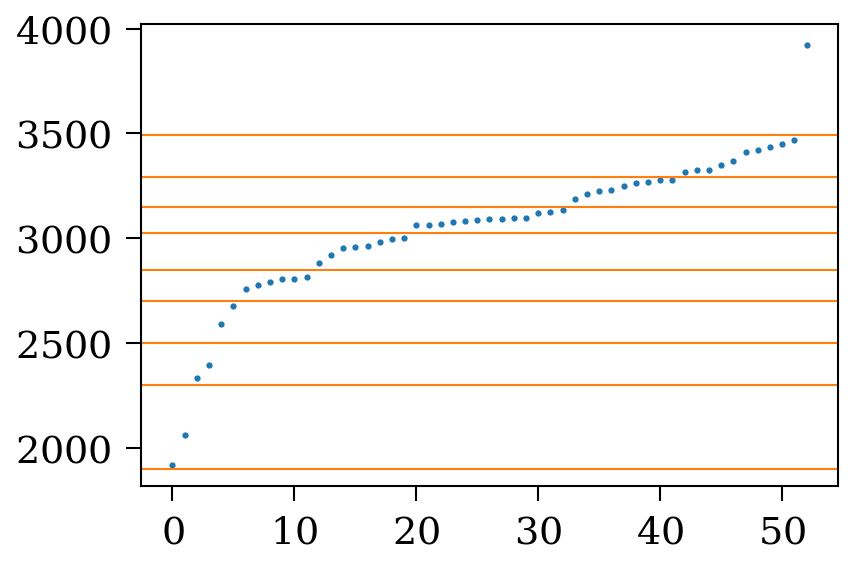

In [5]:
fig, ax = plt.subplots()
#ax.grid()
ax.plot(1e-6 * f_r, '.')
edge_color = 'C1'
edges = 1e6 * np.array([1900, 2300, 2500, 2700, 2850, 3025, 3150, 3290, 3490])
for edge in edges:
    ax.axhline(1e-6 * edge, color=edge_color)

In [6]:
counts, bins = np.histogram(f_r, bins=edges)

In [7]:
bins

array([  1.90000000e+09,   2.30000000e+09,   2.50000000e+09,
         2.70000000e+09,   2.85000000e+09,   3.02500000e+09,
         3.15000000e+09,   3.29000000e+09,   3.49000000e+09])

In [8]:
counts

array([ 2,  2,  2,  6,  8, 13,  9, 10])

In [12]:
for left, right in zip(edges[:-1], edges[1:]):
    f_inside = f_r[(left < f_r) & (f_r < right)]
    f_spacing_min = 3e6
    f_usable = np.array([f for f in f_inside if sorted(np.abs(f - f_inside))[1] > f_spacing_min])
    filename = save_directory + "resonances_180_mK_{:.0f}_MHz.npy".format(1e-6 * f_usable.min())
    print("{}: {}".format(filename, 1e-6 * f_usable))
    np.save(filename, f_usable)

/home/flanigan/temp/resonances_180_mK_1920_MHz.npy: [ 1919.69432779  2062.5021086 ]
/home/flanigan/temp/resonances_180_mK_2335_MHz.npy: [ 2335.40458665  2396.46803224]
/home/flanigan/temp/resonances_180_mK_2591_MHz.npy: [ 2591.00377748  2676.49488674]
/home/flanigan/temp/resonances_180_mK_2758_MHz.npy: [ 2757.56902622  2778.68139395  2792.43786231  2816.12867816]
/home/flanigan/temp/resonances_180_mK_2881_MHz.npy: [ 2881.44454812  2921.42028171  2979.83148276]
/home/flanigan/temp/resonances_180_mK_3085_MHz.npy: [ 3084.91859403  3122.21754392  3126.84980385  3132.52827551]
/home/flanigan/temp/resonances_180_mK_3188_MHz.npy: [ 3187.67210418  3208.74173947  3224.0837836   3229.52479937  3248.25386106
  3263.4529736   3268.23807844]
/home/flanigan/temp/resonances_180_mK_3317_MHz.npy: [ 3316.65056492  3347.30017485  3370.60342733  3409.71130211  3420.6654874
  3433.32176371  3450.51017169  3470.40498453]
